In [19]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
df = pd.read_csv("BostonHousing.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
x = df.loc[:, df.columns !='medv']
y = df.loc[:, df.columns == 'medv']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.3, random_state = 123)

In [27]:
mms = MinMaxScaler()
mms.fit(xtrain)
xtrain = mms.transform(xtrain)
xtest = mms.transform(xtrain)

xtrain[:5], xtest[:5]

C:\Users\heman\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(array([[2.34782498e-03, 2.00000000e-01, 2.38269795e-01, 1.00000000e+00,
         1.50313152e-01, 7.99767622e-01, 4.87234043e-01, 2.91802800e-01,
         8.69565217e-02, 6.87022901e-02, 6.38297872e-01, 9.84542841e-01,
         1.37588652e-01],
        [4.56256121e-04, 2.10000000e-01, 1.89882698e-01, 0.00000000e+00,
         9.81210856e-02, 5.71262587e-01, 1.60638298e-01, 5.15231716e-01,
         1.30434783e-01, 1.06870229e-01, 4.46808511e-01, 1.00000000e+00,
         1.00709220e-01],
        [6.28012552e-04, 0.00000000e+00, 7.33137830e-02, 0.00000000e+00,
         2.00417537e-01, 5.00193648e-01, 5.97872340e-01, 1.30395897e-01,
         8.69565217e-02, 1.14503817e-02, 5.53191489e-01, 1.00000000e+00,
         2.19007092e-01],
        [5.70703456e-02, 0.00000000e+00, 6.46627566e-01, 0.00000000e+00,
         6.70146138e-01, 5.29821844e-01, 9.12765957e-01, 1.09432895e-01,
         1.00000000e+00, 9.14122137e-01, 8.08510638e-01, 9.70220384e-01,
         4.40851064e-01],
        [1.78291606e

In [37]:
model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation="relu", name = 'dense_1'))
model.add(Dense(64, activation= 'relu', name = 'dense_2'))
model.add(Dense(1, activation = 'linear', name = 'dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


C:\Users\heman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(xtrain, xtest, epochs = 100, validation_split = 0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 317.5827 - mae: 14.4753 - val_loss: 40.7903 - val_mae: 6.0919
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39.6971 - mae: 6.1697 - val_loss: 15.2091 - val_mae: 3.8418
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9321 - mae: 3.3551 - val_loss: 3.9934 - val_mae: 1.9096
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2036 - mae: 1.6821 - val_loss: 0.8679 - val_mae: 0.8254
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7549 - mae: 0.7516 - val_loss: 0.2553 - val_mae: 0.3884
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3277 - mae: 0.3863 - val_loss: 0.3393 - val_mae: 0.4240
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3125 - mae: 0.3831 - val_loss: 0.2598 - val_mae: 0.3818
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2787 - mae: 0.3646 - val_loss: 0.2344 - val_mae: 0.3704
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

In [55]:
mse_t, mae_t = model.evaluate(xtrain, xtest)
print(f"Mean square Error: {mse_t}" )
print(f"Mean absolute Error: {mae_t}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1581 - mae: 0.2818
Mean square Error: 0.15662096440792084
Mean absolute Error: 0.2808227837085724


<Axes: title={'center': 'loss Curves'}, xlabel='Epochs', ylabel='Loss'>

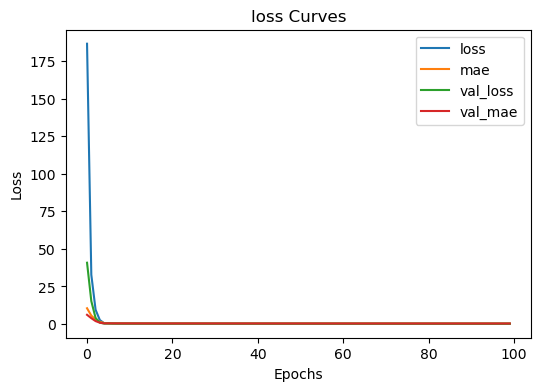

In [57]:
pd.DataFrame(history.history).plot(figsize=(6,4), xlabel="Epochs", ylabel="Loss", title="loss Curves")